In [1]:
import pandas as pd
from Twitter_bot_detection_713.data_prep import get_final_tweet_data
from nltk.tokenize import TweetTokenizer
from gensim.models import Word2Vec
import gensim.downloader as api
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim

In [2]:
df = get_final_tweet_data(en=True)

In [4]:
df[0:100]

,author_id,id,lang,text,created_at,lag,possibly_sensitive,referenced_tweets,reply_category,like_count,quote_count,reply_count,retweet_count,n_mentions,target
13,1000197919,1261733558474829824,en,@trekonomics Same here. Best pate ever....have...,2020-05-16 19:01:36+00:00,33 days 14:13:11,False,True,Reply_to_other,0,0,0,0,1,0
14,1000197919,1264695397588406272,en,PCC is a great example....reach out to your el...,2020-05-24 23:10:54+00:00,8 days 04:09:18,False,True,No_reply,0,0,0,0,0,0
15,1000197919,1271119064941752320,en,both the theorem - and the conclusion. https:/...,2020-06-11 16:36:15+00:00,17 days 17:25:21,False,True,No_reply,0,0,0,0,0,0
16,1000197919,1273846820133695488,en,@GeneralCattis they're learning from the best!,2020-06-19 05:15:23+00:00,7 days 12:39:08,False,True,Reply_to_other,0,0,0,0,1,0
17,1000197919,1275472007769976832,en,this thread... https://t.co/OSveBlPctt,2020-06-23 16:53:18+00:00,4 days 11:37:55,False,True,No_reply,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,100024370,1461464012537806851,en,"CML Pro members, check out community for an up...",2021-11-18 22:39:07+00:00,0 days 03:56:18,False,False,No_reply,33,0,2,0,0,0
115,100024370,1461468803737415685,en,@magicmonk3547 @HedgeMind I wonder how institu...,2021-11-18 22:58:10+00:00,0 days 00:19:03,False,True,Reply_to_other,0,0,0,0,2,0
117,100024370,1461479956324630536,en,@KevinMayes7 Y. Was time to exit pre earnings.,2021-11-18 23:42:29+00:00,0 days 00:43:08,False,True,Reply_to_other,1,0,0,0,1,0
118,100024370,1461481552387346443,en,@Solon_Z @WheredWhoGo Difference between rise ...,2021-11-18 23:48:49+00:00,0 days 00:06:20,False,True,Reply_to_other,5,0,2,0,2,0


In [45]:
df['text']

13         @trekonomics Same here. Best pate ever....have...
14         PCC is a great example....reach out to your el...
15         both the theorem - and the conclusion. https:/...
16            @GeneralCattis they're learning from the best!
17                    this thread... https://t.co/OSveBlPctt
                                 ...                        
2353366    you ruined everything good\nalways said you we...
2353367         for every question why \nyou were my because
2353369    song i wish someone wrote for me pt1: https://...
2353371    song i wish someone wrote for me pt2: https://...
2353372    Behavioral research is built into every journe...
Name: text, Length: 1612980, dtype: object

In [3]:
word2vec = api.load('glove-twitter-200')

In [5]:
word2vec.key_to_index

{'<user>': 0,
 '.': 1,
 ':': 2,
 'rt': 3,
 ',': 4,
 '<repeat>': 5,
 '<hashtag>': 6,
 '<number>': 7,
 '<url>': 8,
 '!': 9,
 'i': 10,
 'a': 11,
 '"': 12,
 'the': 13,
 '?': 14,
 'you': 15,
 'to': 16,
 '(': 17,
 '<allcaps>': 18,
 '<elong>': 19,
 ')': 20,
 'me': 21,
 'de': 22,
 '<smile>': 23,
 '！': 24,
 'que': 25,
 'and': 26,
 '。': 27,
 '-': 28,
 'my': 29,
 'no': 30,
 '、': 31,
 'is': 32,
 'it': 33,
 '…': 34,
 'in': 35,
 'n': 36,
 'for': 37,
 '/': 38,
 'of': 39,
 'la': 40,
 "'s": 41,
 '*': 42,
 'do': 43,
 "n't": 44,
 'that': 45,
 'on': 46,
 'y': 47,
 "'": 48,
 'e': 49,
 'o': 50,
 'u': 51,
 'en': 52,
 'this': 53,
 'el': 54,
 'so': 55,
 'be': 56,
 "'m": 57,
 'with': 58,
 'just': 59,
 '>': 60,
 'your': 61,
 '^': 62,
 'like': 63,
 'have': 64,
 'te': 65,
 'at': 66,
 '？': 67,
 'love': 68,
 'se': 69,
 'are': 70,
 '<': 71,
 'm': 72,
 'r': 73,
 'if': 74,
 'all': 75,
 'b': 76,
 '・': 77,
 'not': 78,
 'but': 79,
 'we': 80,
 'es': 81,
 'ya': 82,
 '&': 83,
 'follow': 84,
 'up': 85,
 'what': 86,
 'get': 87

In [18]:
###import preprocessor as p
##p.set_options(p.OPT.NUMBER)
##tweets = [p.clean(t) for t in df['text']]



['@trekonomics Same here. Best pate ever....have been searching for that taste since.',
 'PCC is a great example....reach out to your elected officials! https://t.co/gee0MRcPmH',
 'both the theorem - and the conclusion. https://t.co/9QfKuRdk24',
 "@GeneralCattis they're learning from the best!",
 'this thread... https://t.co/OSveBlPctt',
 'This. speaking both as a pitch-challenged member of the general public, and a not-fan of martial anthems. Jessye Normal expresses it beautifully. https://t.co/mcpJ89fSIW',
 '@LeeFlower this cuts across skills: my dad ruined "Das Boot" for me with running commentary on the inaccuracies of submarine decor...',
 'months ago, this would have been the headline everywhere. https://t.co/k5MpWlWlj4',
 '@nomadicmatt Brest international maritime festival - thousands of sailboat in the bay.....',
 "@LadyAshBorg @vue_ai Congratulations! can't wait to see this in action.",
 "thread....and this isn't making front pages. , enough already. my bingo card is full. htt

In [5]:
tk = TweetTokenizer()
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stopwords(text):
    return [w for w in text if not w in stop_words]

def lemmatize(text):
    return [lemmatizer.lemmatize(word) for word in text]

In [6]:
###found this function at https://gist.github.com/tokestermw/cb87a97113da12acb388
##this function translates ruby code from GloVe embedding - https://nlp.stanford.edu/projects/glove/preprocess-twitter.rb


import sys
import regex as re

FLAGS = re.MULTILINE | re.DOTALL

def hashtag(text):
    text = text.group()
    hashtag_body = text[1:]
    if hashtag_body.isupper():
        result = " {} ".format(hashtag_body.lower())
    else:
        result = " ".join(["<hashtag>"] + re.split(r"(?=[A-Z])", hashtag_body, flags=FLAGS))
    return result

def allcaps(text):
    text = text.group()
    return text.lower() + " <allcaps>"


def tokenize(text):
    # Different regex parts for smiley faces
    eyes = r"[8:=;]"
    nose = r"['`\-]?"

    # function so code less repetitive
    def re_sub(pattern, repl):
        return re.sub(pattern, repl, text, flags=FLAGS)

    text = re_sub(r"https?:\/\/\S+\b|www\.(\w+\.)+\S*", "<url>")
    text = re_sub(r"@\w+", "<user>")
    text = re_sub(r"{}{}[)dD]+|[)dD]+{}{}".format(eyes, nose, nose, eyes), "<smile>")
    text = re_sub(r"{}{}p+".format(eyes, nose), "<lolface>")
    text = re_sub(r"{}{}\(+|\)+{}{}".format(eyes, nose, nose, eyes), "<sadface>")
    text = re_sub(r"{}{}[\/|l*]".format(eyes, nose), "<neutralface>")
    text = re_sub(r"/"," / ")
    text = re_sub(r"<3","<heart>")
    text = re_sub(r"[-+]?[.\d]*[\d]+[:,.\d]*", "<number>")
    text = re_sub(r"#\S+", hashtag)
    text = re_sub(r"([!?.]){2,}", r"\1 <repeat>")
    text = re_sub(r"\b(\S*?)(.)\2{2,}\b", r"\1\2 <elong>")

    ## -- I just don't understand why the Ruby script adds <allcaps> to everything so I limited the selection.
    # text = re_sub(r"([^a-z0-9()<>'`\-]){2,}", allcaps)
    text = re_sub(r"([A-Z]){2,}", allcaps)

    return text.lower()

In [7]:
def apply_text_cleaning(df, write_to_parquet=False):
    '''Apply all cleaning transformations and writes to parquet if write_to_parquet is set to True'''
    df['clean_text'] = df['text'].apply(tokenize).apply(tk.tokenize).apply(remove_stopwords).apply(lemmatize)
    return df

In [8]:
df = apply_text_cleaning(df[0:100])

/var/folders/qr/rfdswcsx19d9ymx44xfqyk5m0000gn/T/ipykernel_21052/721744362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].apply(tokenize).apply(tk.tokenize).apply(remove_stopwords).apply(lemmatize)


In [9]:
df

,author_id,id,lang,text,created_at,lag,possibly_sensitive,referenced_tweets,reply_category,like_count,quote_count,reply_count,retweet_count,n_mentions,target,clean_text
13,1000197919,1261733558474829824,en,@trekonomics Same here. Best pate ever....have...,2020-05-16 19:01:36+00:00,33 days 14:13:11,False,True,Reply_to_other,0,0,0,0,1,0,"[<user>, ., best, pate, ever, ., <repeat>, sea..."
14,1000197919,1264695397588406272,en,PCC is a great example....reach out to your el...,2020-05-24 23:10:54+00:00,8 days 04:09:18,False,True,No_reply,0,0,0,0,0,0,"[pcc, <allcaps>, great, example, ., <repeat>, ..."
15,1000197919,1271119064941752320,en,both the theorem - and the conclusion. https:/...,2020-06-11 16:36:15+00:00,17 days 17:25:21,False,True,No_reply,0,0,0,0,0,0,"[theorem, -, conclusion, ., <url>]"
16,1000197919,1273846820133695488,en,@GeneralCattis they're learning from the best!,2020-06-19 05:15:23+00:00,7 days 12:39:08,False,True,Reply_to_other,0,0,0,0,1,0,"[<user>, they're, learning, best, !]"
17,1000197919,1275472007769976832,en,this thread... https://t.co/OSveBlPctt,2020-06-23 16:53:18+00:00,4 days 11:37:55,False,True,No_reply,0,0,0,0,0,0,"[thread, ., <repeat>, <url>]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,100024370,1461464012537806851,en,"CML Pro members, check out community for an up...",2021-11-18 22:39:07+00:00,0 days 03:56:18,False,False,No_reply,33,0,2,0,0,0,"[cml, <allcaps>, pro, member, ,, check, commun..."
115,100024370,1461468803737415685,en,@magicmonk3547 @HedgeMind I wonder how institu...,2021-11-18 22:58:10+00:00,0 days 00:19:03,False,True,Reply_to_other,0,0,0,0,2,0,"[<user>, <user>, wonder, institution, find, si..."
117,100024370,1461479956324630536,en,@KevinMayes7 Y. Was time to exit pre earnings.,2021-11-18 23:42:29+00:00,0 days 00:43:08,False,True,Reply_to_other,1,0,0,0,1,0,"[<user>, ., time, exit, pre, earnings, .]"
118,100024370,1461481552387346443,en,@Solon_Z @WheredWhoGo Difference between rise ...,2021-11-18 23:48:49+00:00,0 days 00:06:20,False,True,Reply_to_other,5,0,2,0,2,0,"[<user>, <user>, difference, rise, large, cap,..."


In [10]:
df['clean_text']

13         [<user>, ., best, pate, ever, ., <repeat>, sea...
14         [pcc, <allcaps>, great, example, ., <repeat>, ...
15                        [theorem, -, conclusion, ., <url>]
16                      [<user>, they're, learning, best, !]
17                              [thread, ., <repeat>, <url>]
                                 ...                        
2353366    [ruined, everything, good, always, said, misun...
2353367                                    [every, question]
2353369    [song, wish, someone, wrote, pt, <number>, <url>]
2353371    [song, wish, someone, wrote, pt, <number>, <url>]
2353372    [behavioral, research, built, every, journey, ...
Name: clean_text, Length: 1612980, dtype: object

In [10]:
from sklearn.model_selection import train_test_split

X = df[['clean_text']]

y = df['target'].map(lambda x: 1 if x == 'bot' else 0)

X_train_id, X_test_id, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Function to convert a sentence (list of words) into a matrix representing the words in the embedding space
def embed_sentence(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.index_to_key:
            embedded_sentence.append(word2vec[word])
        
    return np.array(embedded_sentence)

#Function that converts a list of sentences into a list of matrices
def embedding(word2vec, sentences):
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed

# Embed the training and test sentences

X_train_embed = X_train_id['clean_text'].apply(lambda x: embed_sentence(word2vec, x))
X_test_embed = X_test_id['clean_text'].apply(lambda x: embed_sentence(word2vec, x))

##X_train_embed = embedding(word2vec, X_train_id['clean_text'])
##X_test_embed = embedding(word2vec, X_test_id['clean_text'])




In [13]:
len(X_train_embed)

80

In [21]:
xtr = pd.DataFrame(X_train_embed)
xte = pd.DataFrame(X_test_embed)

In [16]:
len(X_train_embed[519816][0])

25

In [17]:
import pickle

In [18]:
pickle_out = open("X_train_embed_25.pickle","wb")
pickle.dump(X_train_embed, pickle_out)

In [19]:
pickle_out = open("X_test_embed_25.pickle","wb")
pickle.dump(X_test_embed, pickle_out)

In [42]:
pickle_in = open("X_test_embed_25.pickle","rb")
X_train_mm = pickle.load(pickle_in)

In [44]:
len(X_train_mm)

322596

In [29]:
pickle_out = open("y_train_25.pickle","wb")
pickle.dump(y_train, pickle_out)

In [32]:
pickle_out = open("y_test_25.pickle","wb")
pickle.dump(y_test, pickle_out)

In [53]:
pickle_in = open("y_train.pickle","rb")
y_train_mm= pickle.load(pickle_in)

In [55]:
pickle_out = open("X_train_id.pickle","wb")
pickle.dump(X_train_id, pickle_out)

In [56]:
pickle_out = open("X_test_id.pickle","wb")
pickle.dump(X_test_id, pickle_out)

(array([1.246278e+06, 3.380800e+05, 2.639600e+04, 1.388000e+03,
        5.870000e+02, 1.590000e+02, 3.500000e+01, 4.200000e+01,
        1.400000e+01, 1.000000e+00]),
 array([  0.,  21.,  42.,  63.,  84., 105., 126., 147., 168., 189., 210.]),
 <BarContainer object of 10 artists>)

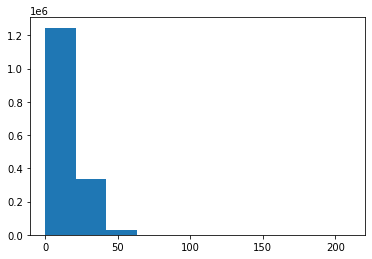

In [58]:
import matplotlib.pyplot as plt
len_lis = []
for sentence in df['clean_text']:
    len_lis.append(len(sentence))

plt.hist(len_lis)

In [ ]:
# Pad the training and test embedded sentences
X_train_pad = pad_sequences(X_train_embed, dtype='float32', padding='post', maxlen=60)
X_test_pad = pad_sequences(X_test_embed, dtype='float32', padding='post', maxlen=60)

In [ ]:
from tensorflow import keras.